In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/1000_richest_people_in_the_world.csv')

In [5]:
df.head(5)

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [6]:
df.isnull().sum()

,0
Name,0
Country,0
Industry,0
Net Worth (in billions),0
Company,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(1000, 5)

In [9]:
df.count()

,0
Name,1000
Country,1000
Industry,1000
Net Worth (in billions),1000
Company,1000


In [10]:
df.head(5)

,Name,Country,Industry,Net Worth (in billions),Company
0,Rob Walton,Mexico,Finance,8.50,Walmart
1,Sergey Brin,USA,Automotive,44.76,Google
2,Steve Ballmer,USA,Manufacturing,13.43,Koch Industries
3,Mukesh Ambani,USA,Technology,120.44,Google
4,Jim Walton,USA,Fashion,122.39,Walmart


In [14]:
GroupBy_Industry = df.groupby('Industry')['Net Worth (in billions)'].sum()
GroupBy_Industry

,Net Worth (in billions)
Industry,
Automotive,4198.07
Cosmetics,4708.24
Fashion,3889.92
Finance,5108.42
Manufacturing,9938.73
Media,5733.05
Petrochemicals,4336.01
Retail,23353.29
Technology,35574.00


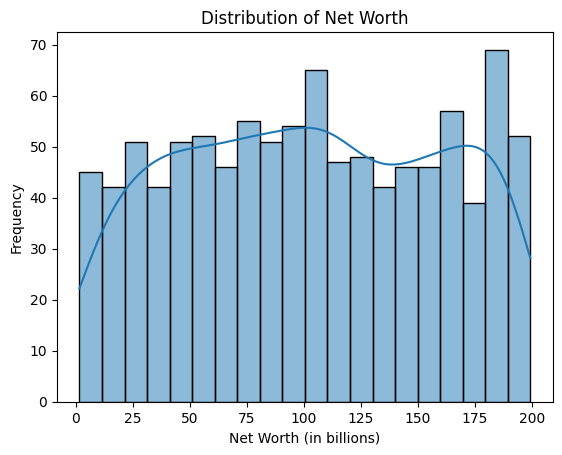

In [18]:
sns.histplot(df['Net Worth (in billions)'],bins=20,edgecolor='black',kde=True)
plt.title('Distribution of Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Frequency')
plt.show()

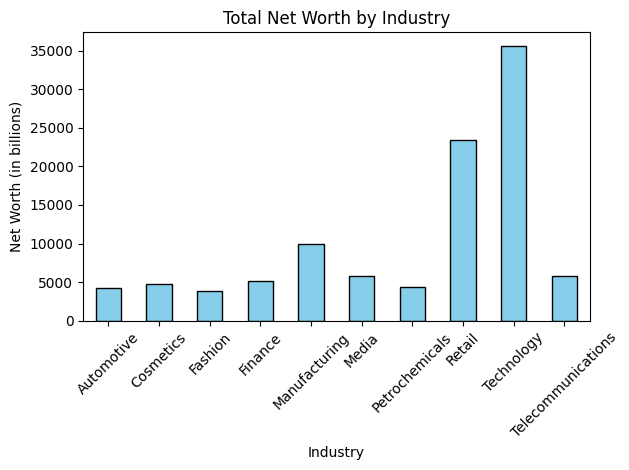

In [21]:
GroupBy_Industry = df.groupby('Industry')['Net Worth (in billions)'].sum()
GroupBy_Industry.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Total Net Worth by Industry')
plt.xlabel('Industry')
plt.ylabel('Net Worth (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()

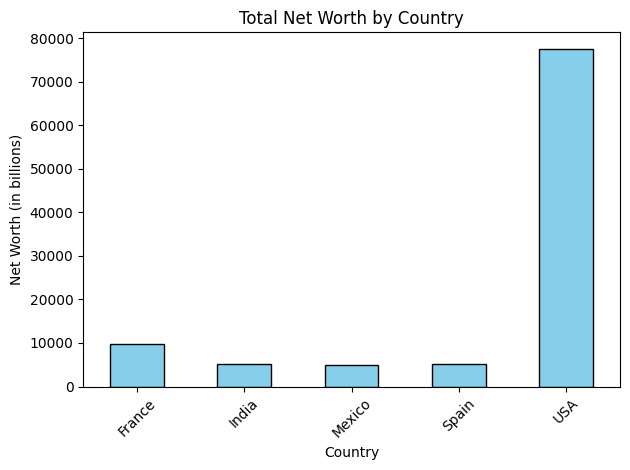

In [22]:
GroupBy_Country = df.groupby('Country')['Net Worth (in billions)'].sum()
GroupBy_Country.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Total Net Worth by Country')
plt.xlabel('Country')
plt.ylabel('Net Worth (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()

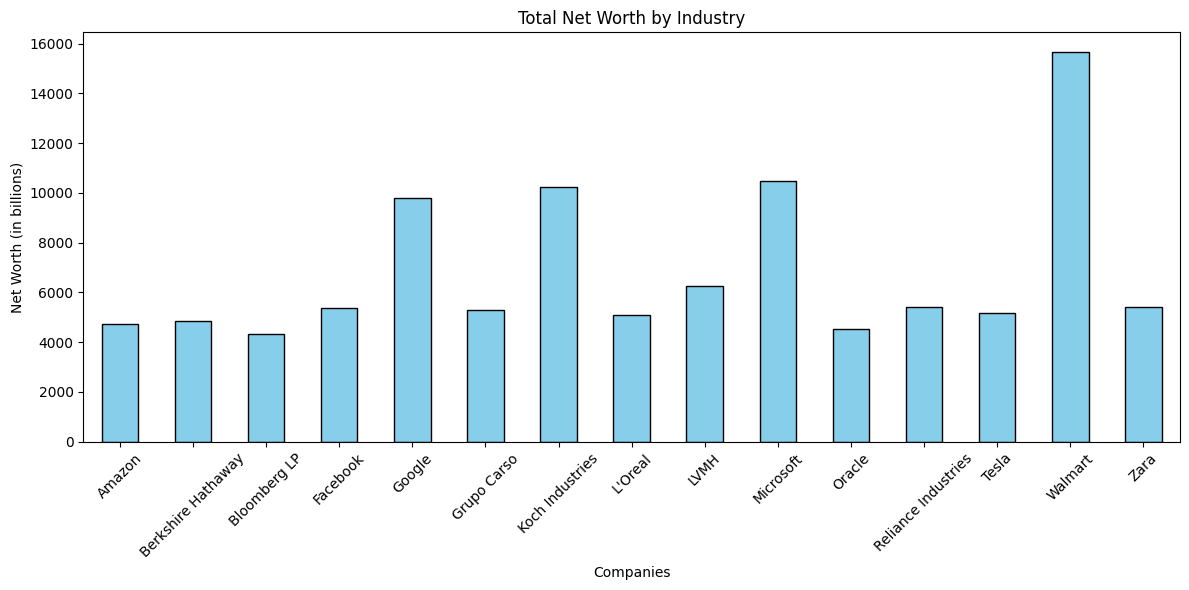

In [27]:
plt.figure(figsize=(12,6))
GroupBy_Company = df.groupby('Company')['Net Worth (in billions)'].sum()
GroupBy_Company.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title('Total Net Worth by Industry')
plt.xlabel('Companies')
plt.ylabel('Net Worth (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()

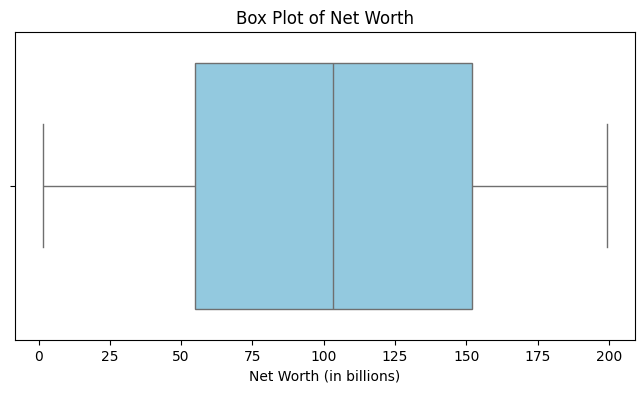

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Net Worth (in billions)'], color='skyblue')
plt.title('Box Plot of Net Worth')
plt.xlabel('Net Worth (in billions)')
plt.show()

<ipython-input-32-313c9a6ce892>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Net Worth (in billions)', y='Industry', data=df, palette='viridis')


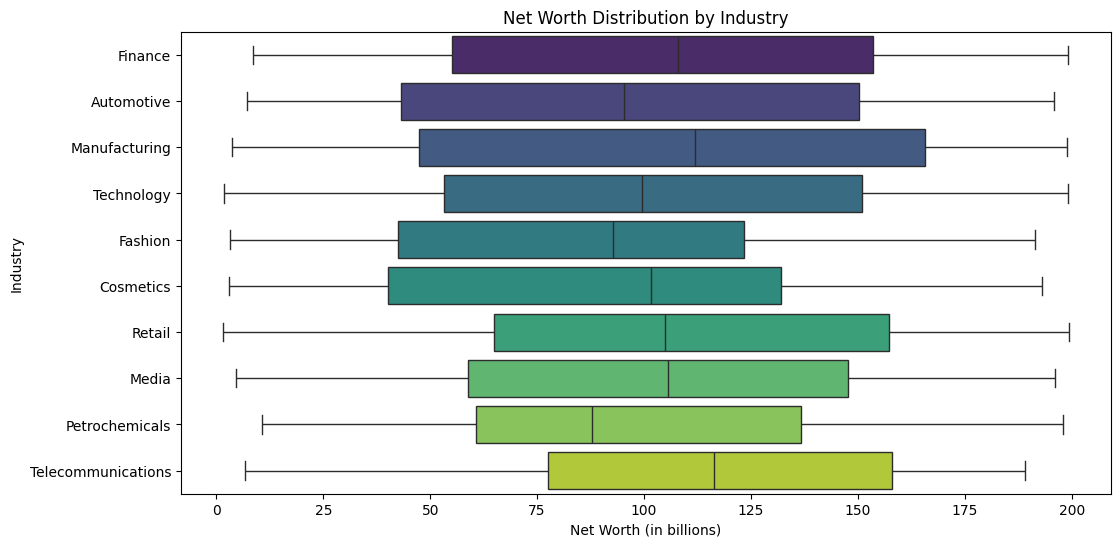

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Net Worth (in billions)', y='Industry', data=df, palette='viridis')
plt.title('Net Worth Distribution by Industry')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Industry')
plt.show()

<ipython-input-34-8678caa44c6a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Net Worth (in billions)', y='Company', data=df, palette='viridis')


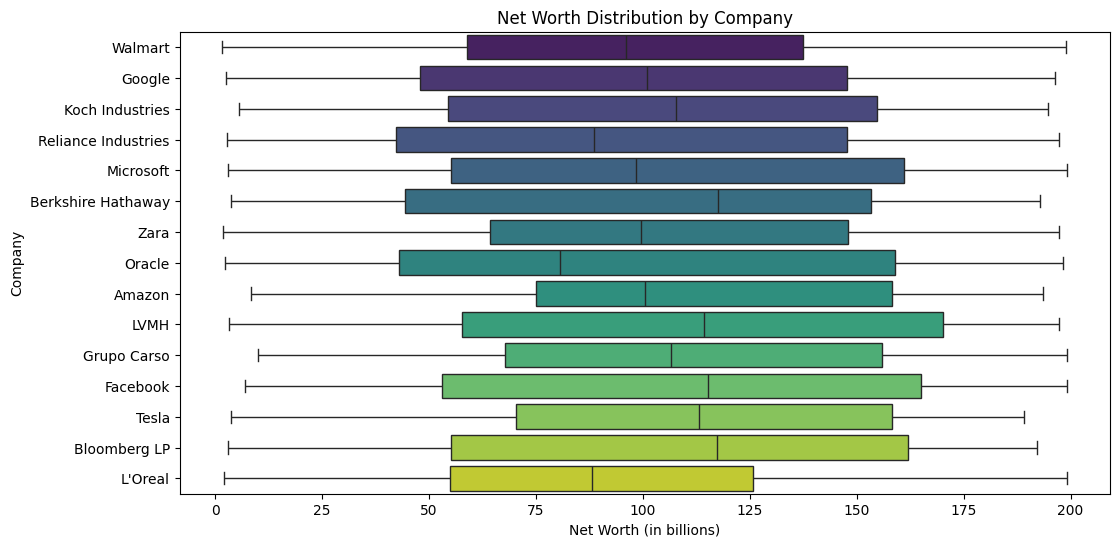

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Net Worth (in billions)', y='Company', data=df, palette='viridis')
plt.title('Net Worth Distribution by Company')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Company')
plt.show()

<ipython-input-35-034f326b3974>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Net Worth (in billions)', y='Country', data=df, palette='viridis')


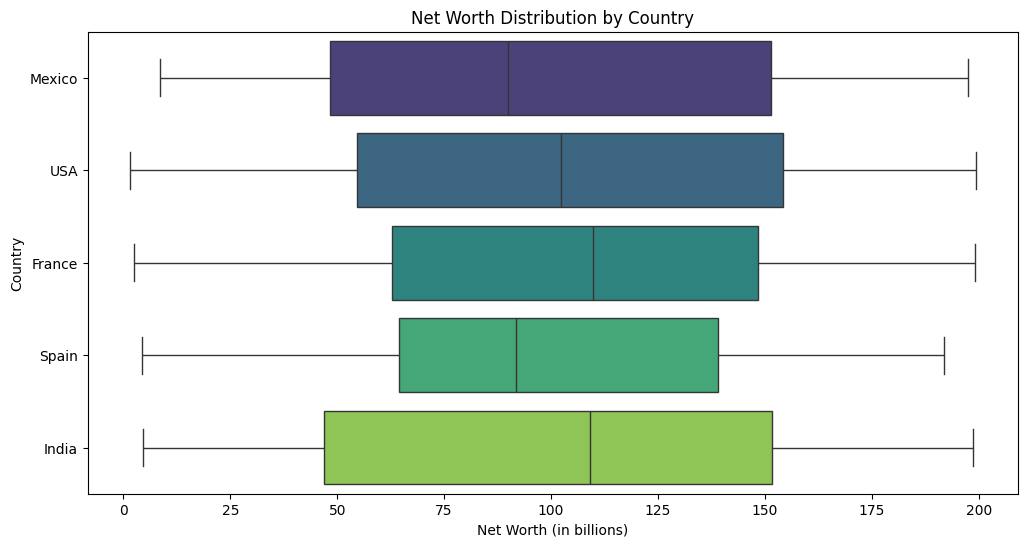

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Net Worth (in billions)', y='Country', data=df, palette='viridis')
plt.title('Net Worth Distribution by Country')
plt.xlabel('Net Worth (in billions)')
plt.ylabel('Country')
plt.show()

In [36]:
import plotly.express as px

country_data = df.groupby('Country', as_index=False)['Net Worth (in billions)'].sum()

# Choropleth Map for Total Net Worth by Country
fig = px.choropleth(country_data, locations='Country', locationmode='country names',
                    color='Net Worth (in billions)', hover_name='Country',
                    title='Total Net Worth by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_geos(showcoastlines=True)
fig.show()


In [38]:
fig = px.treemap(df, path=['Company'], values='Net Worth (in billions)',
                 title='Net Worth Distribution by Company',
                 color='Net Worth (in billions)', hover_data=['Company'],
                 color_continuous_scale='Viridis')
fig.show()

In [39]:
fig = px.treemap(df, path=['Country'], values='Net Worth (in billions)',
                 title='Net Worth Distribution by Country',
                 color='Net Worth (in billions)', hover_data=['Country'],
                 color_continuous_scale='Viridis')
fig.show()

In [40]:
fig = px.treemap(df, path=['Industry'], values='Net Worth (in billions)',
                 title='Net Worth Distribution by Industry',
                 color='Net Worth (in billions)', hover_data=['Industry'],
                 color_continuous_scale='Viridis')
fig.show()

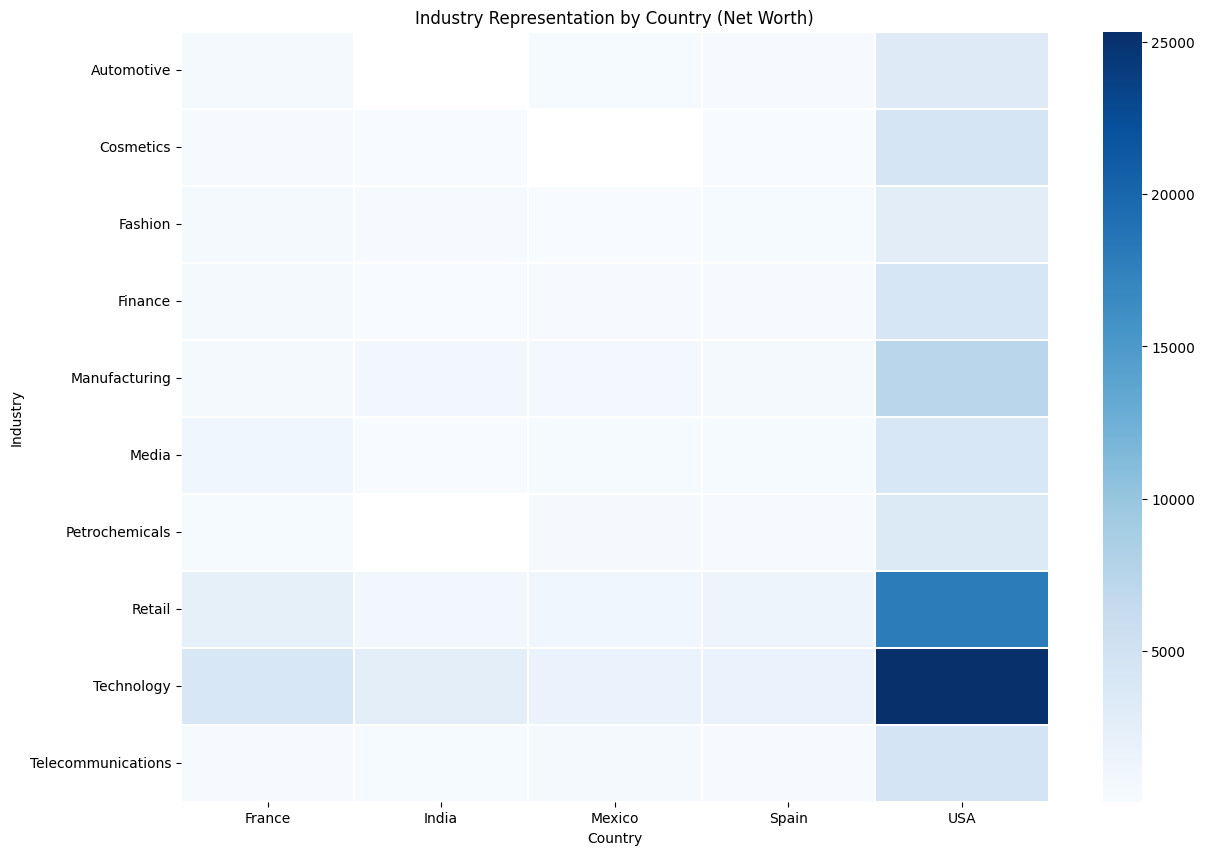

In [41]:
# Create a pivot table
industry_country_pivot = df.pivot_table(index='Industry', columns='Country', values='Net Worth (in billions)', aggfunc='sum')

# Heatmap for Industry Representation by Country
plt.figure(figsize=(14, 10))
sns.heatmap(industry_country_pivot, cmap='Blues', linecolor='white', linewidths=0.1)
plt.title('Industry Representation by Country (Net Worth)')
plt.xlabel('Country')
plt.ylabel('Industry')
plt.show()
